In [3]:
import pandas as pd
import numpy as np
from itertools import product

In [26]:
# get results for zero dice
all_results = []

# initializing K
k = 2
# using product() to get Combinations and repeat to get elements
combos = list(product(range(1, 7), repeat = k))

# parse combinations, taking lower result from each
dice = 0
crit = 0
success = 0
mixed = 0
fail = 0
total = 36
for combo in combos:
    if min(combo) == 6:
        success += 1
    elif min(combo) >= 4:
        mixed += 1
    else: fail +=1
percent_success = round(success / total * 100)
percent_mixed = round(mixed / total * 100)
percent_fail = round(fail / total * 100)
results = [dice, percent_fail, percent_mixed, percent_success, crit]
all_results.append(results)
all_results

[[0, 75, 22, 3, 0]]

In [27]:
# get results for non-zero dice pools

# loop through pool totals from one to seven
for i in range(7):

# initializing K
    k = i + 1
    # using product() to get Combinations and repeat to get elements
    combos = list(product(range(1, 7), repeat = k))
    
    # parse the combinations for outcomes
    dice = k
    crit = 0
    success = 0
    mixed = 0
    fail = 0
    total = 6**k
    for combo in combos:
        if combo.count(6) >= 2:
            crit += 1
        elif max(combo) == 6:
            success += 1
        elif max(combo) >= 4:
            mixed += 1
        else:
            fail += 1
    percent_crit = round(crit / total * 100)
    percent_success = round(success / total * 100)
    percent_mixed = round(mixed / total * 100)
    percent_fail = round(fail / total * 100)
    results = [dice, percent_fail, percent_mixed, percent_success, percent_crit]
    all_results.append(results)
all_results

[[0, 75, 22, 3, 0],
 [1, 50, 33, 17, 0],
 [2, 25, 44, 28, 3],
 [3, 12, 45, 35, 7],
 [4, 6, 42, 39, 13],
 [5, 3, 37, 40, 20],
 [6, 2, 32, 40, 26],
 [7, 1, 27, 39, 33]]

In [28]:
# Create a dataframe with the action roll probabilities
action_df = pd.DataFrame(all_results, columns=['Dice', '% Failure', '% Mixed', '% Success', '% Critical'])
action_df.set_index('Dice')

,% Failure,% Mixed,% Success,% Critical
Dice,,,,
0,75,22,3,0
1,50,33,17,0
2,25,44,28,3
3,12,45,35,7
4,6,42,39,13
5,3,37,40,20
6,2,32,40,26
7,1,27,39,33


In [8]:
from matplotlib import pyplot as plt

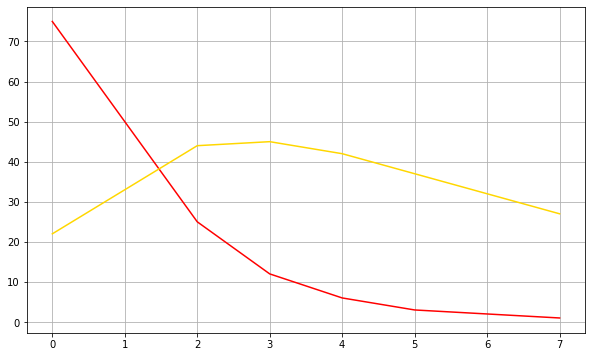

In [31]:
plt.subplots(figsize=(10, 6))
plt.plot(action_df['Dice'], action_df['% Failure'], color='red')
plt.plot(action_df['Dice'], action_df['% Mixed'], color='gold')
plt.grid(True)
plt.show()